<a href="https://colab.research.google.com/github/alisterpage/CHEM3580-Jupyter-Notebooks/blob/main/lectorials/h2_frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#@title
!pip install ipympl -q 2>&1 >/dev/null
!pip install ipysheet -q 2>&1 >/dev/null
from google.colab import output
output.enable_custom_widget_manager()

The equilibrium bond length of the H$_{2}$ molecule is 0.751 $\mathring A$, and the bond dissociation energy is 436 kJ/mol. The potential energy surface of the H$_{2}$ molecule can be approximated using a <font color='blue'>harmonic potential energy surface</font>,

<center>$U_{\text{stretch}} = k(\Delta R)^2$</center>

where the harmonic force constant for H$_{2}$ is $k = 1.02 × 10^{3}$ N m$^{-1}$.

What about quantum mechanics though?? According to quantum mechanics, this bond will vibrate with one of an <b>infinite set of frequencies</b> - in the same way that the motion and energy of any quantum mechanical particle is quantised (recall the 'particle-in-a-box' from CHEM2410!!).
 <br> <br>
It can be shown that for this H$_{2}$ molecule, the energies of these different vibrations can be expressed quite simply,

<center>$E_{n} = h \left( n + \frac{1}{2} \right) \nu$</center>

where $n = 0, 1, 2, ...$ is the vibrational quantum number  of the molecule, and $\nu$ is the fundamental frequency of the vibration (s$^{-1}$),

<center>$\nu = \frac{1}{2\pi}\left( \sqrt{\frac{2k}{m}} \right)$</center>
 <br> <br>
It is possible to measure the energies $E_{n}$ very accurately spectroscopically, and these energies for the first few vibrational states of the H$_{2}$ molecule are provided in the table below.

<style>
table {
    width: 1%;
}
td {
    white-space: nowrap;
    overflow: hidden;
    text-overflow: ellipsis;
}
</style>

<table>
  <thead>
    <tr>
      <th>$n$</th>
      <th>$E_{n}$ (J)</th>
      <th>$\tilde{\nu}$ (cm$^{-1}$)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>$5.62 \times 10^{-20}$</td>
      <td>-</td>
    </tr>
    <tr>
      <td>1</td>
      <td>$1.69 \times 10^{-20}$</td>
      <td>4,161</td>
    </tr>
    <tr>
      <td>2</td>
      <td>$2.81 \times 10^{-20}$</td>
      <td>8,087</td>
    </tr>
    <tr>
      <td>3</td>
      <td>$3.94 \times 10^{-20}$</td>
      <td>11,782</td>
    </tr>
    <tr>
      <td>4</td>
      <td>$5.07 \times 10^{-20}$</td>
      <td>15,250</td>
    </tr>
  </tbody>
</table>


The widget below calculates the vibrational energies of H$_{2}$, $E_{n}$, assuming a Harmonic potential energy $U_{\text{stretch}}$. Change the value of the Harmonic force constant $k$ and quantum number $n$ to answer the following questions.

1. How do the vibrational energies change with the value of $k$?
2. Is it possible to adjust $k$ to reproduce the low-energy experimental frequencies?
3. Is it possible to adjust $k$ to reproduce the high-energy experimental frequencies?
4. Is it possible to adjust $k$ to reproduce <b>both</b> the low- and high-energy experimental frequencies at the same time?

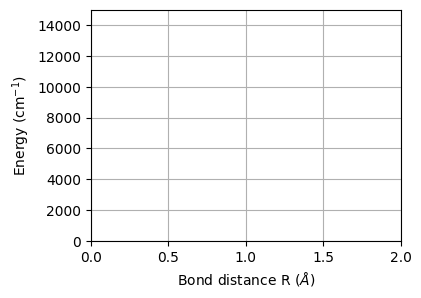

interactive(children=(FloatSlider(value=1000.0, description='value', max=2000.0, min=1.0), Output()), _dom_cla…

In [9]:
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Create slider
slider = widgets.FloatSlider(min=1.0, max=2e3, value=1e3)

# Define globals
x = np.linspace(0.1, 5, 150)
fig, ax = plt.subplots(figsize=(4, 3))
ax.set_ylim([0, 15000])
ax.set_xlim([0, 2])
ax.set_ylabel("Energy (cm$^{-1}$)")
ax.set_xlabel("Bond distance R ($\AA$)")
ax.set_title(None)
ax.grid(True)

def E_n(n, value):
    c = 3.0e8
    h = 6.626e-34
    mu = 1.08 * 1.08 / (1.08 + 1.08) * 1.66054E-27
    nu = 1 / (2 * np.pi) * sqrt(value / mu)
    return h * (n + 0.5) * nu

def nu_tilde(n, value):
    c = 3.0e8
    h = 6.626e-34
    mu = 1.08 * 1.08 / (1.08 + 1.08) * 1.66054E-27
    nu = 1 / (2 * np.pi) * sqrt(2 * value / mu)
    my_lambda = h * c / (E_n(n, value) - E_n(0, value)) / 1e-9
    return 1e7 / my_lambda

def harmonic(value):
    xmin = 0.751
    return value * (x - xmin) ** 2 / 0.0119627

def update(value):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.set_ylim([0, 15000])
    ax.set_xlim([0, 2])
    ax.set_ylabel("Energy (cm$^{-1}$)")
    ax.set_xlabel("Bond distance R ($\AA$)")
    ax.set_title(None)
    ax.grid(True)
    ax.plot(x, harmonic(value), color='blue')
    plt.show()
    plt.close(fig)

    # Update table
    nvalues = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
    exp_values = np.array([4161.0, 8087.0, 11782.0, 15250.0])
    data = []
    data.append([nvalues[0], E_n(0, value), 0, 0, 0])
    for i in range(1, 5):
        data.append([nvalues[i], float(E_n(i, value)), nu_tilde(i, value), exp_values[i-1], nu_tilde(i, value) - exp_values[i-1]])

    df = pd.DataFrame(data, columns=["n", "Energy (J)", "Harmonic ν̃ (cm-1)", "Exp. ν̃ (cm-1)", "Difference (cm-1)"])
    df["Energy (J)"] = df["Energy (J)"].apply(lambda x: "{:.6e}".format(x))
    df["n"] = df["n"].astype(int)
    df["Exp. ν̃ (cm-1)"] = df["Exp. ν̃ (cm-1)"].apply(lambda x: str(round(x, 1)))
    df["Harmonic ν̃ (cm-1)"] = df["Harmonic ν̃ (cm-1)"].apply(lambda x: str(round(x, 2)))
    df["Difference (cm-1)"] = df["Difference (cm-1)"].apply(lambda x: str(round(x, 2)))
    display(df)

widgets.interact(update, value=slider);